In [117]:
import math
sqrt5 = math.sqrt(5)
f = lambda x: x ** 2 - 1
f2 = lambda x: (x + 0.23000) ** 2 - 1

In [177]:
import numpy as np

def binsearch(f, a, b, eps):
    delta = eps / 4
    if b - a < eps:
        return a, 1, 0
    x1 = (a + b) / 2 - delta
    x2 = (a + b) / 2 + delta
#     print("{} {} {} {}".format(a, b, f(x1), f(x2)))
    if f(x1) > f(x2):
        first = x1
        second = b
    else:
        first = a
        second = x2
    solution, iterations, fcalls = binsearch(f, first, second, eps)
    return solution, iterations + 1, fcalls + 2

In [178]:
binsearch(f2, -1, 1, 1e-10)

(-0.2300008797221067, 37, 72)

In [179]:
gold_2_k = (sqrt5 - 1) / 2
gold_1_k = 1 - gold_2_k

def gold(f, a, b, eps, prev=None):
#     print("{} {}".format(a, b))
#     print(b - a)
    if b - a < eps:
        return a, 1, 0
    x1 = a + gold_1_k * (b - a)
    x2 = a + gold_2_k * (b - a)
    
    if prev is None:
        f1 = f(x1)
        f2 = f(x2)
        current_calls = 2
    elif prev[0] == 'left':
        current_calls = 1
        f1 = prev[1]
        f2 = f(x2)
    else:
        current_calls = 1
        f2 = prev[1]
        f1 = f(x1)
    
    if f1 > f2:
        first = x1
        second = b
        prev = ('left', f2)
    else:
        first = a
        second = x2
        prev = ('right', f1)
    solution, iterations, fcalls = gold(f, first, second, eps, prev)
    return solution, iterations + 1, fcalls + current_calls

In [180]:
import numpy as np
F_len = 200
F = np.zeros(F_len).tolist()
F[0] = F[1]  = 1
for i in range(2, F_len):
    F[i] = F[i - 1] + F[i - 2]

def fibbonacci(f, a, b, eps, prev=None, k=None, n=None):
    def find_n(a, b, eps):
        for i in range(F_len):
            if F[i] > (b - a) / eps:
                return i - 2
    
    if k is None:
        n = find_n(a, b, eps)
        k = 1
        
    x1 = a + (F[n - k + 1] / F[n - k + 3]) * (b - a)
    x2 = a + (F[n - k + 2] / F[n - k + 3]) * (b - a)
    
    if k == n:
        return x1, 1, 0

    
    if k == 1:
        f1 = f(x1)
        f2 = f(x2)
        current_calls = 2
    elif prev[0] == 'left':
        current_calls = 1
        f1 = prev[1]
        f2 = f(x2)
    else:
        current_calls = 1
        f2 = prev[1]
        f1 = f(x1)
    
    if f1 > f2:
        first = x1
        second = b
        prev = ('left', f2)
    else:
        first = a
        second = x2
        prev = ('right', f1)
    solution, iterations, fcalls = fibbonacci(f, first, second, eps, prev, k + 1, n)
    return solution, iterations + 1, fcalls + current_calls
        
    

In [181]:
binsearch(f2, -1, 1, 1e-10)

(-0.2300008797221067, 37, 72)

In [182]:
gold(f2, -1, 1, 1e-10)

(-0.23000000745628116, 51, 51)

[10, 13, 17, 20, 23, 27, 30, 33]
[13, 17, 22, 27, 32, 36, 41, 46]
[10, 15, 20, 25, 29, 34, 39, 44]


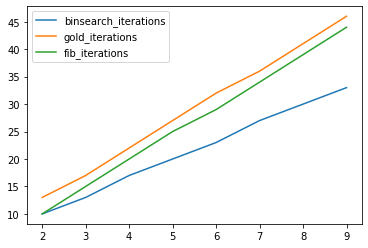

[18, 24, 32, 38, 44, 52, 58, 64]
[13, 17, 22, 27, 32, 36, 41, 46]
[10, 15, 20, 25, 29, 34, 39, 44]


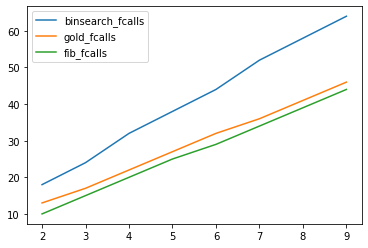

In [183]:
from matplotlib import pyplot as plt

methods = [binsearch, gold]

def plot_stat(f, method, name, precs, stat_name):
    results = [method(f, -1, 1, 10 ** (-prec)) for prec in precs]
    iterations = [res[1] for res in results]
    fcalls = [res[2] for res in results]
    if stat_name == 'iterations':
        stat_f = iterations
    else:
        stat_f = fcalls
    print(stat_f)
    plt.plot(precs, stat_f, label='{}_{}'.format(name, stat_name))
    
prec_range = range(2, 10)

plot_stat(f2, binsearch, 'binsearch', prec_range, 'iterations')
plot_stat(f2, gold, 'gold', prec_range, 'iterations')
plot_stat(f2, fibbonacci, 'fib', prec_range, 'iterations')
plt.legend()
plt.show()

plot_stat(f2, binsearch, 'binsearch', prec_range, 'fcalls')
plot_stat(f2, gold, 'gold', prec_range, 'fcalls')
plot_stat(f2, fibbonacci, 'fib', prec_range, 'fcalls')
plt.legend()
plt.show()

### Одномерный поиск
На графиках представлена зависимость количества итераций метода и вызовов минимизируемых фукнций от необходимой точности. На оси x отмечены log(precision). Видно, что бинарный поиск требует меньше итераций в константу раз, нежели метод фиббоначчи и золотого сечения (это связано с основанием экспоненциальной функции уменьшения границ интервала). Тем не менее в методах фиббоначчи и золотого сечения количество вызовов минимизируемой функции удается сократить до количества итераций, что в константу раз меньше, чем при бинарном поиске.

In [184]:
f3 = lambda x: (x[0] + 1) ** 2 - 1
f3_grad = lambda x: [2 * (x[0] + 1)]

f4 = lambda x: x[0] ** 2 + x[1] ** 2
f4_grad = lambda x: [x[0] * 2, x[1] * 2]

step_resolver_const = lambda x, y, z, w: [0.4]

def minus(x, y):
    return [x[i] - y[i] for i in range(len(x))]


def mult(a, x):
    return [a * xi for xi in x]

def norm(x):
    return math.sqrt(sum([xi ** 2 for xi in x]))

def descent(x_0, f, fgrad, prec, step_resolver=None, lin_search=False):
    x = x_0
    step = 1e-1
    stop = False
    iterations = 0
    trace = [(x, f(x))]
    while not stop:
        f_cur = f(x)
        fgrad_cur = fgrad(x)
        if lin_search:
            step = linear_search(x, f, fgrad_cur)
        else:
            step = step_resolver(lambda st: f(minus(x, mult(st, fgrad_cur))), 0, 1, 1e-5)[0]
        x = minus(x, mult(step, fgrad_cur))
        stop = norm(mult(step, fgrad_cur)) < prec
        iterations += 1
        trace.append((x, f(x)))
    return x, iterations, trace

In [185]:
def linear_search(x, f, fgrad_cur):
    delta = 0.5
    epsilon = 0.5
    lk = 1
    while f(minus(x, mult(lk, fgrad_cur))) > f(x) - epsilon * lk * (norm(fgrad_cur) ** 2):
        lk /= 2
    print(lk)
    return lk

In [186]:
descent([0.7], f3, f3_grad, 1e-15, step_resolver_const, True)

0.5
1


([-1.0], 2, [([0.7], 1.8899999999999997), ([-1.0], -1.0), ([-1.0], -1.0)])

In [187]:
descent([0.7, 0.7], f4, f4_grad, 1e-15, lin_search=True)[1]

0.5
1


2

In [188]:
descent([0.7, 0.8], f4, f4_grad, 1e-15, lin_search=True)

0.5
1


([0.0, 0.0],
 2,
 [([0.7, 0.8], 1.1300000000000001), ([0.0, 0.0], 0.0), ([0.0, 0.0], 0.0)])

In [189]:
descent([0.7, 0.8], f4, f4_grad, 1e-15, step_resolver=binsearch)

([2.249076010737093e-25, 2.5703725837210296e-25],
 5,
 [([0.7, 0.8], 1.1300000000000001),
  ([8.840549468924763e-06, 1.0103485107437749e-05], 1.8023572622872228e-10),
  ([1.1165044987520808e-10, 1.27600514144305e-10], 2.874771416722733e-20),
  ([1.4100733219354196e-15, 1.6115123679298866e-15], 4.5852788852249796e-30),
  ([1.7808318510586133e-20, 2.0352364012295653e-20], 7.31354929063472e-40),
  ([2.249076010737093e-25, 2.5703725837210296e-25], 1.1665158121217797e-49)])

In [190]:
descent([0.7, 0.8], f4, f4_grad, 1e-15, step_resolver=gold)

([6.057376607357365e-21, 6.922716122581437e-21],
 4,
 [([0.7, 0.8], 1.1300000000000001),
  ([6.751412975014581e-06, 7.715900542826226e-06], 1.051166983459813e-10),
  ([6.511653879881399e-11, 7.44189014831488e-11], 9.778336523096052e-21),
  ([6.280409213363924e-16, 7.177610529447987e-16], 9.096163279974905e-31),
  ([6.057376607357365e-21, 6.922716122581437e-21], 8.46158098772092e-41)])

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


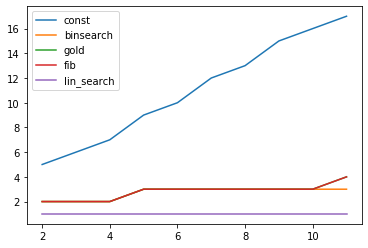

In [200]:
from matplotlib import pyplot as plt

methods = [step_resolver_const, binsearch, gold, fibbonacci]

method_names = {
    step_resolver_const : 'const',
    binsearch : 'binsearch',
    gold : 'gold',
    fibbonacci : 'fib'
}

prec_range = range(2, 12)

for method in methods:
    plt.plot(prec_range, [descent([0.6], f3, f3_grad, 10 ** (-prec), step_resolver=method)[1] for prec in prec_range], 
             label=method_names[method])

plt.plot(prec_range, [descent([0.6], f3, f3_grad, prec, lin_search=True)[1] for prec in prec_range], 
    label='lin_search')

plt.legend()
plt.show()

In [145]:
def draw_function(f, f_grad, method, x_min, x_max, x_step, y_min, y_max, y_step, levels):
    trace = descent([0.5], f, f_grad, method)[2]
    print('Answer =', trace[-1])
#     print(len(trace), 'steps')
    
    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[f(np.array([x, y])) for x in x_s] for y in y_s])
    
    plt.figure()
#     cs = plt.contour(x_s, y_s, z_s, levels=levels)
    # plt.clabel(cs)
    xspace = np.linspace(x_min, x_max)
    plt.plot(xspace, [f([xi]) for xi in xspace])
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        print(cur_point)
        next_point = trace[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

Answer = ([-0.9999999999901696], -1.0)
17 steps
([0.5], 1.25)
([-0.7000000000000002], -0.9100000000000001)
([-0.9400000000000001], -0.9964)
([-0.988], -0.999856)
([-0.9976], -0.99999424)
([-0.99952], -0.9999997696)
([-0.999904], -0.999999990784)
([-0.9999808], -0.99999999963136)
([-0.99999616], -0.9999999999852544)
([-0.999999232], -0.9999999999994101)
([-0.9999998464], -0.9999999999999764)
([-0.99999996928], -0.999999999999999)
([-0.999999993856], -1.0)
([-0.9999999987712], -1.0)
([-0.99999999975424], -1.0)
([-0.999999999950848], -1.0)


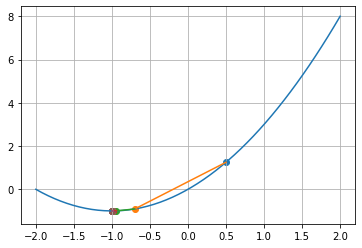

In [146]:
show_trace_marker = lambda trace: [trace[i] for i in range(len(trace)) if i % 100 == 0 or i < 10]
draw_function(f3, f3_grad, step_resolver_const, -2, 2, 1e-2, 0, 2, 1e-2, 5)

Answer = ([-0.9999997984875932], -0.9999999999999594)
4 steps
([0.5], 1.25)
([-0.9999741118621828], -0.9999999993298043)
([-0.9999997984875932], -0.9999999999999594)


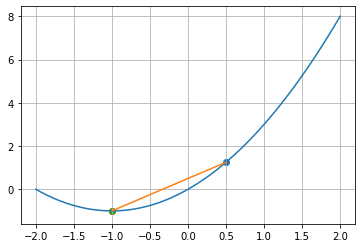

In [147]:
draw_function(f3, f3_grad, binsearch, -2, 2, 1e-2, 0, 2, 1e-2, 5)

Answer = ([-0.999999992549388], -0.9999999999999999)
4 steps
([0.5], 1.25)
([-0.9999855326864822], -0.9999999997906969)
([-0.9999999924884143], -0.9999999999999999)


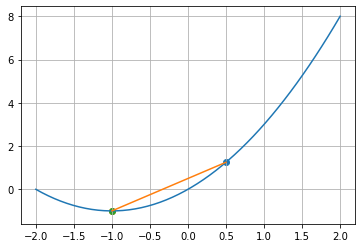

In [148]:
draw_function(f3, f3_grad, gold, -2, 2, 1e-2, 0, 2, 1e-2, 5)